In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [94]:
headerList = ['EventID', 'Path length (mm)', 'step length (mm)', 'Loss Energy (MeV)', 'Kinetic Energy (MeV)', 'copyNo']

originalData = pd.read_csv('VolumeSD_nt_Step.csv', skiprows=11, names=headerList)
processedData = pd.DataFrame(columns=headerList)

In [95]:
originalData.head()

,EventID,Path length (mm),step length (mm),Loss Energy (MeV),Kinetic Energy (MeV),copyNo
0,1,49.9004,0.000434,0.000014,5.48999,1
1,1,50.1209,0.020866,0.001011,5.46135,3
2,1,50.3637,0.063744,0.003904,5.43904,5
3,1,50.5947,0.094712,0.006961,5.41700,7
4,1,50.8212,0.121193,0.009777,5.39821,9


In [96]:
for i in range(len(originalData)):
    if originalData['EventID'][i] == 1:
        processedData = processedData.append(originalData.iloc[i], ignore_index=True)

In [97]:
processedData.head()

,EventID,Path length (mm),step length (mm),Loss Energy (MeV),Kinetic Energy (MeV),copyNo
0,1.0,49.9004,0.000434,0.000014,5.48999,1.0
1,1.0,50.1209,0.020866,0.001011,5.46135,3.0
2,1.0,50.3637,0.063744,0.003904,5.43904,5.0
3,1.0,50.5947,0.094712,0.006961,5.41700,7.0
4,1.0,50.8212,0.121193,0.009777,5.39821,9.0


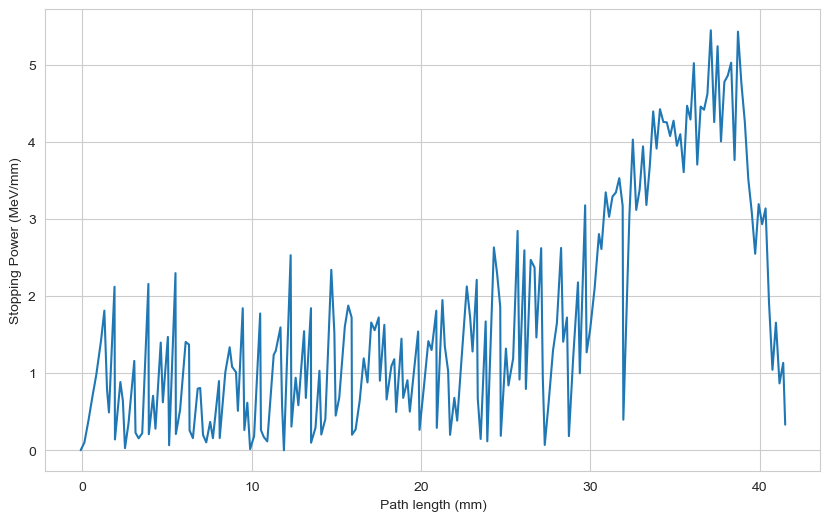

In [98]:
# plot data
# x = 0 to 50 mm
# y = Stopping Power (MeV/mm)
# you need to calculate the stopping power from the energy loss and step length
# stopping power = energy loss / step length

plt.figure(figsize=(10, 6))

X = processedData['Path length (mm)'] - 50
Y = processedData['Loss Energy (MeV)'] / 0.01

sns.set_style('whitegrid')
ax = sns.lineplot(x=X, y=Y, data=processedData)
ax.set(xlabel='Path length (mm)', ylabel='Stopping Power (MeV/mm)')
plt.show()

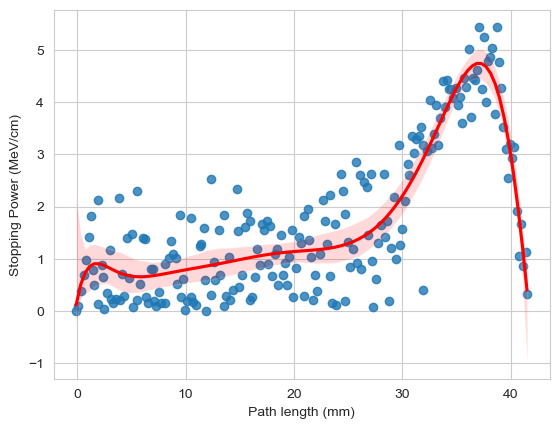

In [99]:
ax1 = sns.regplot(x=X, y=Y, data=processedData, order=11, line_kws={'color': 'red'})
ax1.set(xlabel='Path length (mm)', ylabel='Stopping Power (MeV/cm)')
plt.show()